# Análisis del dataset de AIRBNB 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

# SECCIÓN 1

Cargar el csv de AIRBNB NYC

In [5]:
df1=pd.read_excel("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/NYC.xlsx",sheet_name = "NYC1")
df2=pd.read_excel("/Users/rociocuestapedraz/Desktop/PYTHON bootcamp DS/datasets/NYC.xlsx",sheet_name = "NYC2")



In [9]:
df=pd.merge(df1,df2,on="id")
df.head()

,id,name,host_id,host_name,municipio,barrio,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaT,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


1.	Graficar por municipio el número de habitaciones de cada tipo

In [22]:
room_type=df.groupby("room_type").count()["id"]

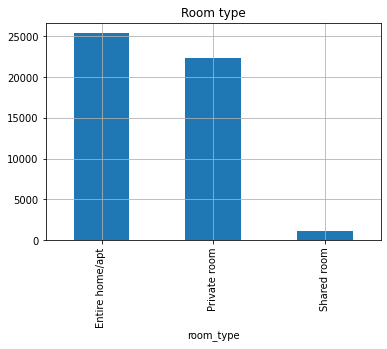

In [24]:
room_type.plot(kind="bar",legend=False,grid=True,title="Room type")

2.	Graficar por municipio el número de reviews

3.	Graficar el número de habitaciones individuales, casa/ dep completo y compartido de cada municipio.

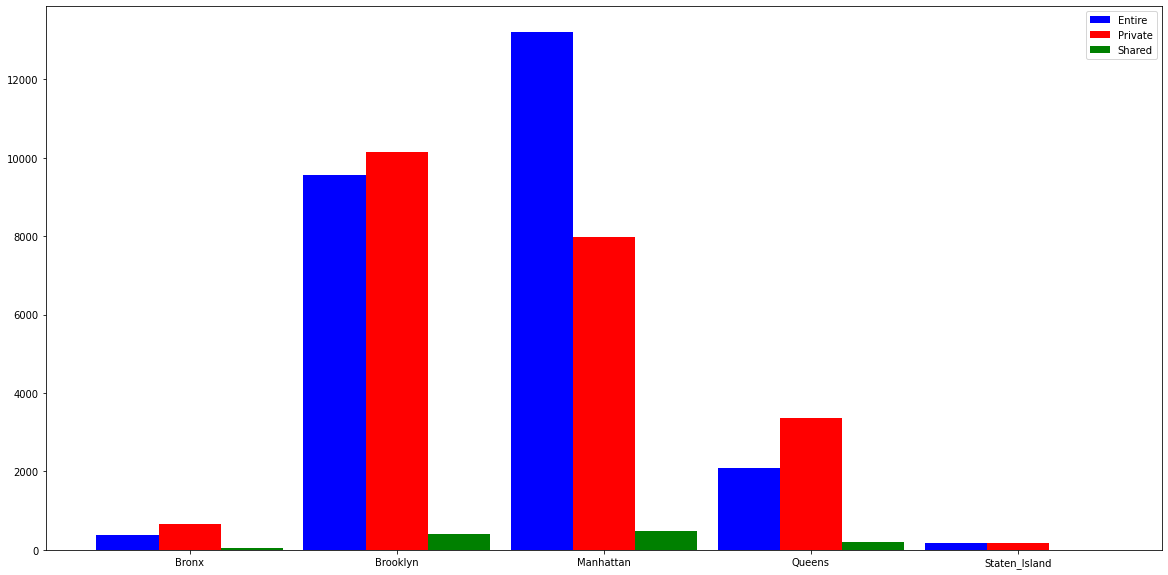

In [61]:
df2=df.groupby(["municipio","room_type"],as_index=False).count()
Bronx=df2[df2["municipio"]=="Bronx"]["id"]
Brooklyn=df2[df2["municipio"]=="Brooklyn"]["id"].reset_index(drop=True)
Manhattan=df2[df2["municipio"]=="Manhattan"]["id"].reset_index(drop=True)
Queens=df2[df2["municipio"]=="Queens"]["id"].reset_index(drop=True)
Staten_Island=df2[df2["municipio"]=="Staten Island"]["id"].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(20,10))
etiquetas=["Bronx","Brooklyn","Manhattan","Queens","Staten_Island"]
Entire=[Bronx[0],Brooklyn[0],Manhattan[0],Queens[0],Staten_Island[0]]
Private=[Bronx[1],Brooklyn[1],Manhattan[1],Queens[1],Staten_Island[1]]
Shared=[Bronx[2],Brooklyn[2],Manhattan[2],Queens[2],Staten_Island[2]]
x = np.arange(len(etiquetas))  # the label locations
ancho=0.3
plt.bar(x - ancho, Entire, ancho, color="blue")
plt.bar(x, Private, ancho ,color="red")
plt.bar(x + ancho, Shared, ancho ,color="green")
ax.set_xticks(x)
ax.set_xticklabels(etiquetas)
plt.legend(["Entire","Private","Shared"])
plt.show()

4.	Graficar la cantidad de reviews de cada municipio de acuerdo a tipo de habitación

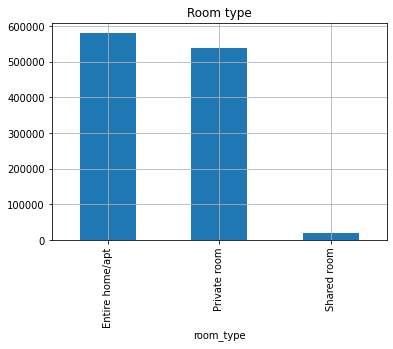

In [65]:
df2=df.groupby(["room_type"])["number_of_reviews"].sum()
df2.plot(kind="bar",legend=False,grid=True,title="Room type")

5.	Graficar en un diagrama de caja el precio por habitación de cada municipio

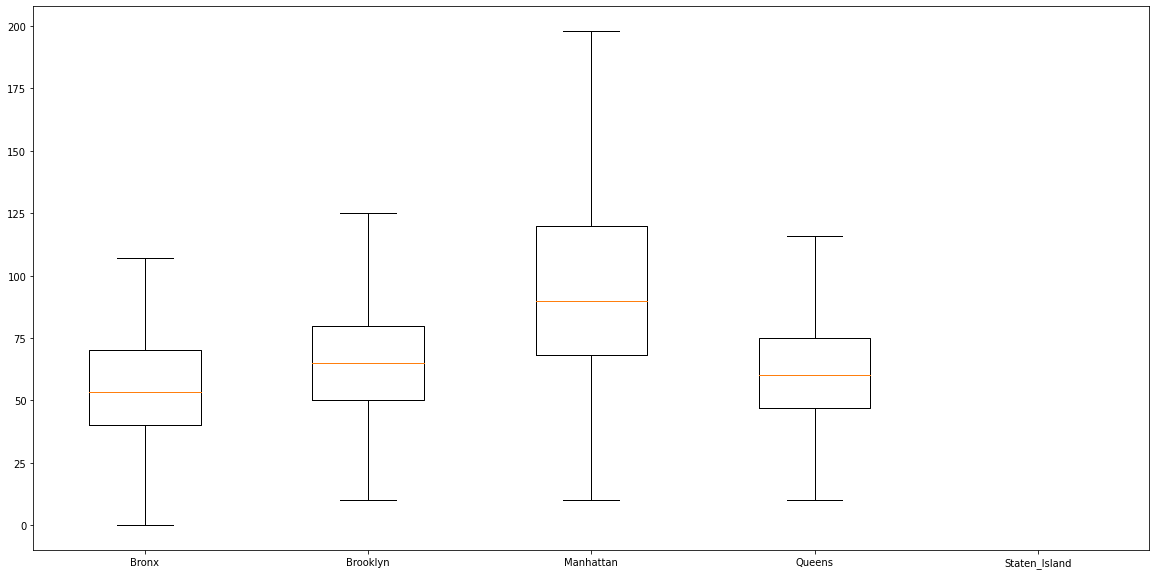

In [91]:
Bronx=df[(df["room_type"]=="Private room")&(df["municipio"]=="Bronx")]["price"]
Brooklyn=df[(df["room_type"]=="Private room")&(df["municipio"]=="Brooklyn")]["price"]
Manhattan=df[(df["room_type"]=="Private room")&(df["municipio"]=="Manhattan")]["price"]
Queens=df[(df["room_type"]=="Private room")&(df["municipio"]=="Queens")]["price"]
Staten_Island=df[(df["room_type"]=="Private room")&(df["municipio"]=="Staten_Island")]["price"]

all_data=[Bronx,Brooklyn,Manhattan,Queens,Staten_Island]
labels=["Bronx","Brooklyn","Manhattan","Queens","Staten_Island"]

fig, ax = plt.subplots(figsize=(20,10))

ax.boxplot(all_data, labels=labels, showfliers=False)
plt.show()

6.	Graficar el precio en el eje “y” y en el eje “x” los 10 barrios con el mayor precio por habitación individual.

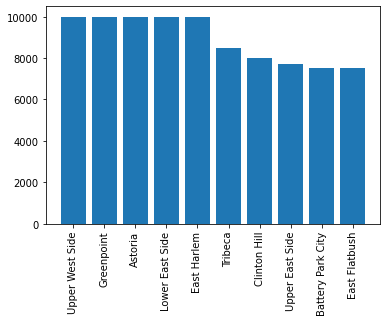

In [138]:
df2=df.groupby("barrio",as_index=False)["price"].max().sort_values(by=["price"],ascending=False).head(10)
labels=df2["barrio"]
y=df2["price"]
plt.bar(labels,y)
plt.xticks(labels, rotation='vertical')

plt.show()

In [124]:
df2=df[df["room_type"]=="Private room"].sort_values(by=["price"],ascending=False).head(10)
df2

df2=df.groupby("barrio",as_index=False)["price"].max().sort_values(by=["price"],ascending=False).head(10)
df2

,barrio,price
202,Upper West Side,10000.0
91,Greenpoint,10000.0
4,Astoria,10000.0
119,Lower East Side,9999.0
61,East Harlem,9999.0
197,Tribeca,8500.0
41,Clinton Hill,8000.0
201,Upper East Side,7703.0
6,Battery Park City,7500.0
60,East Flatbush,7500.0


7.	Graficar el precio en el eje “y” y en el eje “x” los 10 barrios con el menor precio por dep/casa completo.


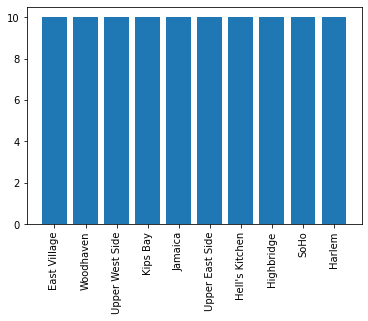

In [139]:
df2=df.groupby("barrio",as_index=False)["price"].min().sort_values(by=["price"])
df2=df2[df2["price"]>0].head(10)
labels=df2["barrio"]
y=df2["price"]
plt.bar(labels,y)
plt.xticks(labels, rotation='vertical')

plt.show()

8.	Graficar por municipio el top 5 de Airbnb con mayor rating 

9.	En una gráfica scatter muestra precio vs rating de los primeros 50 Airbnb


# SECCIÓN 2

1.	Mostrar en un mapa un marcador por Airbnb diferenciando por color cada municipio delos primeros 25 Airbnb con mayor precio

In [149]:
df2=df.sort_values(by="price",ascending=False).head(25)


In [150]:
latitude=40.730610
longitude=-73.935242
NY_map = folium.Map(location=[latitude, longitude], zoom_start=11)


In [148]:
Y=df2["latitude"]
X=df2["longitude"]
rooms = folium.map.FeatureGroup()
for lat, lng, in zip(Y, X): #la columna Y y X son las coordenadas 
    rooms.add_child(
            folium.CircleMarker([lat, lng],
            radius=5, # difine el tamaño de los circulos
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Agrega incidentes al map
NY_map.add_child(rooms)

2.	Mostrar en un mapa los 100 Airbnb con mayor rating 

3.	Mostrar en un mapa los 3 Airbnb con mayor rating de cada barrio 

4.	Mostrar en un mapa los 25 Airbnb con mayor número de reviews  

In [153]:
df2=df.sort_values(by="number_of_reviews",ascending=False).head(25)

In [154]:
latitude=40.730610
longitude=-73.935242
NY_map = folium.Map(location=[latitude, longitude], zoom_start=11)

In [155]:
Y=df2["latitude"]
X=df2["longitude"]
rooms = folium.map.FeatureGroup()
for lat, lng, in zip(Y, X): #la columna Y y X son las coordenadas 
    rooms.add_child(
            folium.CircleMarker([lat, lng],
            radius=5, # difine el tamaño de los circulos
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Agrega incidentes al map
NY_map.add_child(rooms)